In [61]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [62]:
# Load the dataset
# Display the first few rows of the dataset
df = pd.read_csv('./climate_change_indicators.csv')
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [63]:
df.tail(10)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
215,216,Vanuatu,VU,VUT,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.706,0.585,0.573,1.146,1.131,0.613,0.897,1.226,1.147,1.479
216,217,"Venezuela, Rep. Bolivariana de",VE,VEN,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.941,0.865,1.094,1.098,0.726,0.843,1.235,1.350,0.734,0.533
217,218,Vietnam,VN,VNM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.895,0.540,1.222,1.191,1.121,0.817,1.811,1.477,1.114,1.033
218,219,Wallis and Futuna Islands,WF,WLF,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.773,0.686,0.724,1.267,1.062,0.920,1.379,1.274,1.029,0.951
219,220,West Bank and Gaza,PS,PSE,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.114,0.863,1.326,1.615,0.735,2.007,1.204,1.455,1.787,1.074
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686
224,225,Zimbabwe,ZW,ZWE,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.118,0.025,0.970,1.270,0.088,0.453,0.925,0.389,-0.125,-0.490


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

In [65]:
# Check missing data
df.isna().any()

ObjectId     False
Country      False
ISO2          True
ISO3         False
Indicator    False
             ...  
F2018         True
F2019         True
F2020         True
F2021         True
F2022         True
Length: 72, dtype: bool

In [66]:
missing_values = df.iloc[:, :10].isnull().sum()
# showing values
missing_values

ObjectId               0
Country                0
ISO2                   2
ISO3                   0
Indicator              0
Unit                   0
Source                 0
CTS_Code               0
CTS_Name               0
CTS_Full_Descriptor    0
dtype: int64

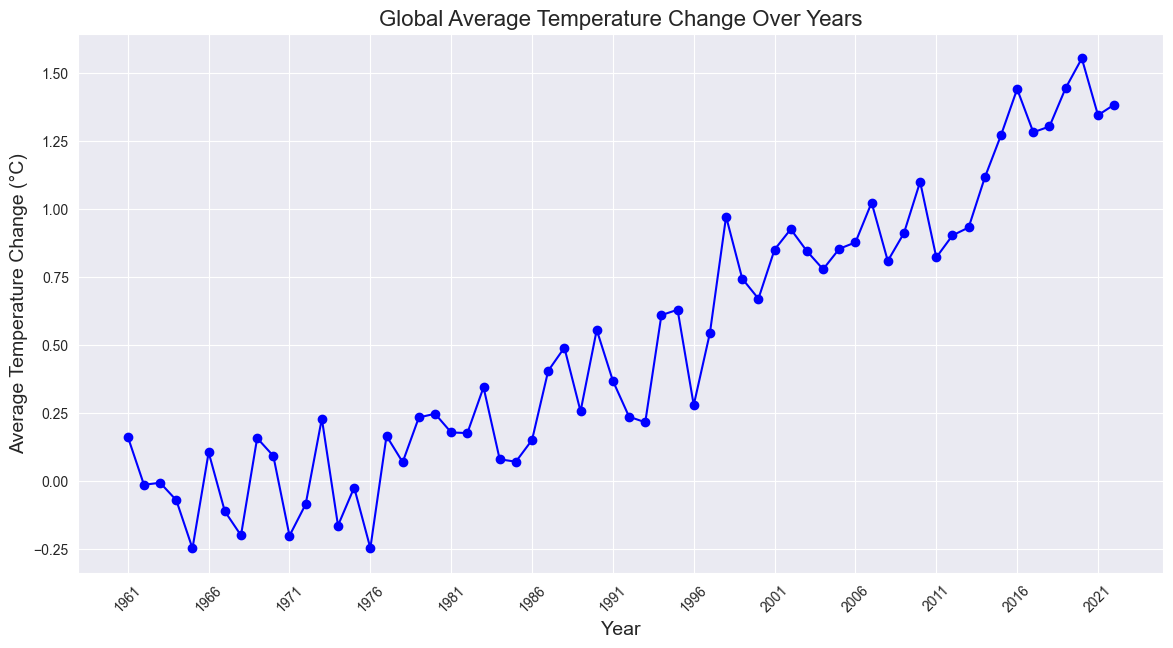

In [67]:
# Time Series Plot of Global Average Temperature Change

# Calculate the global average temperature change for each year
years = [col for col in df.columns if col.startswith('F')]
global_avg_temp_change = df[years].mean()

# Convert and format years from string 'FYYYY' to integer YYYY for plotting
int_years = [int(year[1:]) for year in years]

# Time Series Plot
plt.figure(figsize=(14, 7))
plt.plot(int_years, global_avg_temp_change, marker='o', linestyle='-', color='b')
plt.title('Global Average Temperature Change Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature Change (°C)', fontsize=14)
plt.xticks(int_years[::5], rotation=45)  # Show every 5th year for clarity
plt.grid(True)
plt.show()

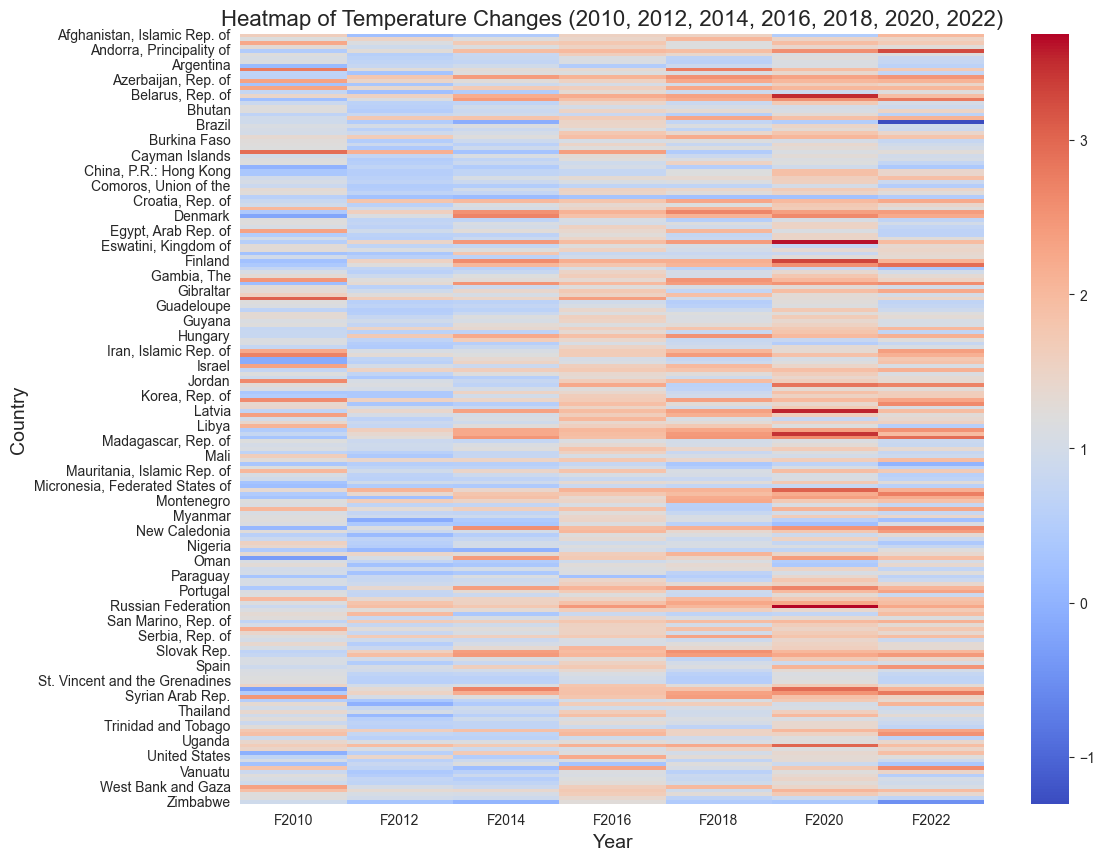

In [68]:
# For the heatmap, we'll select a subset of years for better visibility and clarity
selected_years = ['F2010', 'F2012', 'F2014', 'F2016', 'F2018', 'F2020', 'F2022']
heatmap_data = df.set_index('Country')[selected_years].dropna()  # Drop countries with missing values for simplicity

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Heatmap of Temperature Changes (2010, 2012, 2014, 2016, 2018, 2020, 2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

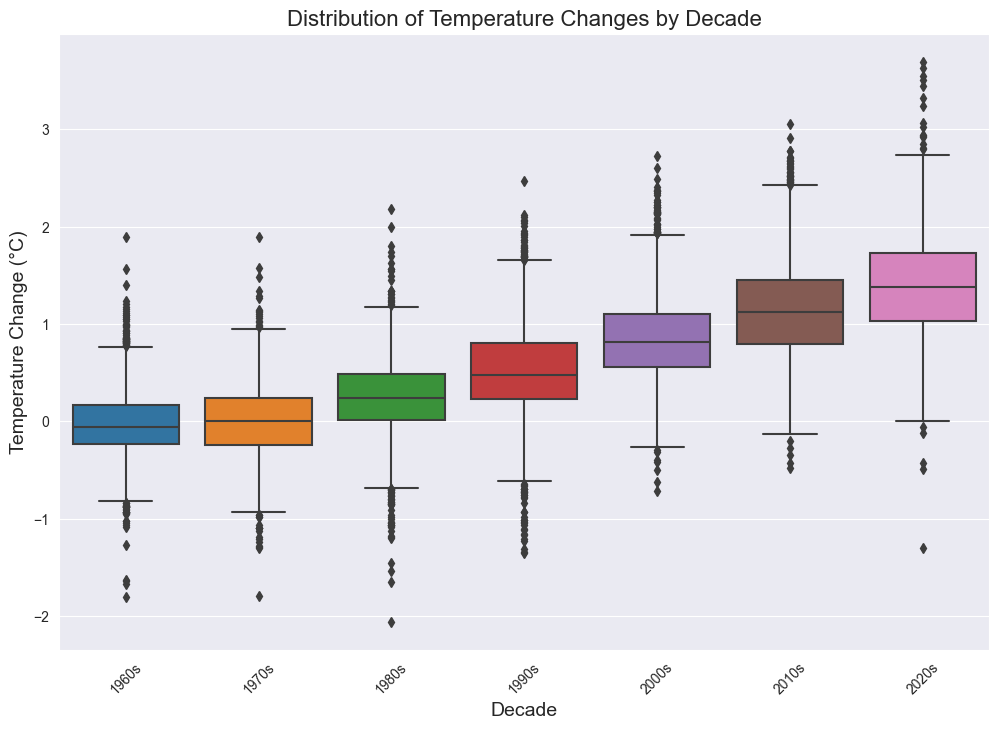

In [69]:
# For the box plot, we'll categorize the years into decades for simplicity
# Creating a new DataFrame with year as a column and a new decade column
decade_data = pd.melt(df, id_vars=['Country'], value_vars=years, var_name='Year', value_name='TempChange')
decade_data['Decade'] = decade_data['Year'].apply(lambda x: x[1:4] + "0s")  # Group years into decades

# Creating the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Decade', y='TempChange', data=decade_data)
plt.title('Distribution of Temperature Changes by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Temperature Change (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [70]:
df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

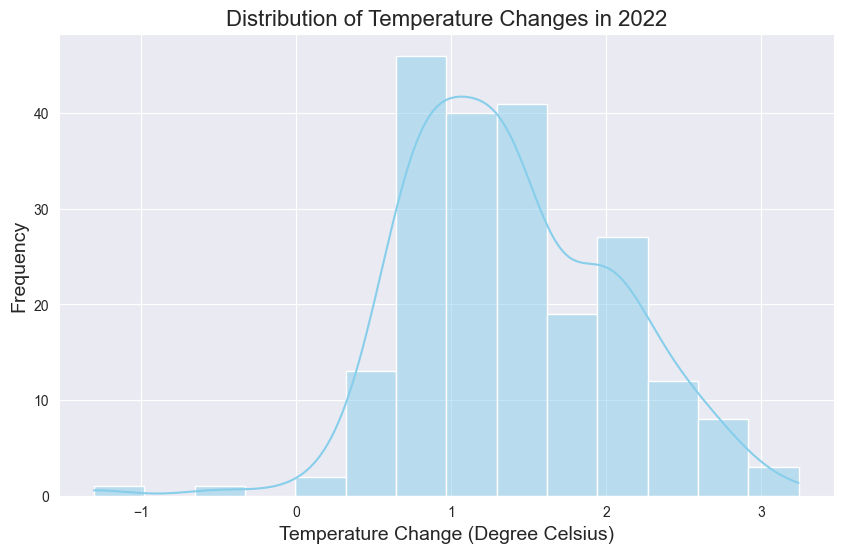

In [71]:
# Set the plot size for better readability
plt.figure(figsize=(10, 6))

# Create the histogram for temperature changes in 2022
sns.histplot(df['F2022'], color='skyblue', kde=True)

# Add a title to the plot
plt.title('Distribution of Temperature Changes in 2022', fontsize=16)

# Label the axes
plt.xlabel('Temperature Change (Degree Celsius)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [72]:
# Predict temperature change in 2022 (F2022)
# Data Preparation
# Dropping rows with missing values in the specified columns to keep the example simple
df_clean = df[['F2020', 'F2021', 'F2022']].dropna()

# Feature Selection
X = df_clean[['F2020', 'F2021']].values  # Features: Temperature changes in 2020 and 2021
y = df_clean['F2022'].values  # Target: Temperature changes in 2022

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
r2

0.36919374615084966